In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import itertools
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib
import numpy as np

%matplotlib inline

# Print Versions
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.5.2 (v3.5.2:4def2a2901a5, Jun 26 2016, 10:47:25) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
Pandas version 0.19.0
Matplotlib version 1.5.3


In [2]:
if not os.path.exists('./data'):
    os.makedirs('./data')

In [3]:
with open('./data/dlc.csv', 'w') as csvfile:
    csvwriter = csv.writer( csvfile)

    html = urlopen('http://store.steampowered.com/app/221680/')
    bsObj = BeautifulSoup(html, 'html.parser')

    nameList = bsObj.findAll('div', {'class':'game_area_dlc_name'})
    priceList = bsObj.findAll('div', {'class':'game_area_dlc_price'})
    

    for name, price in itertools.zip_longest(list(nameList), list(priceList)):
       csvwriter.writerow([(name.get_text()).strip(), (price.get_text()).strip()])
pass

In [4]:
df = pd.read_csv('./data/dlc.csv', header=None)

In [5]:
df.shape

(803, 2)

In [6]:
pack = df[0].str.contains('Song Pack')

In [7]:
df[pack].to_csv('./data/pack.csv', encoding='utf-8')

In [8]:
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)

In [9]:
df.columns = ['Song / Song Pack', 'Price']

In [10]:
df.head(10)

,Song / Song Pack,Price
0,Rocksmith® 2014 – Jet - “Are You Gonna Be My G...,2.99
1,Rocksmith® 2014 – Def Leppard - “Rock of Ages”,2.99
2,Rocksmith® 2014 – Fleetwood Mac - “Go Your Own...,2.99
3,Rocksmith® 2014 – Kansas - “Dust In the Wind”,2.99
4,Rocksmith® 2014 – Hit Singles Song Pack,9.99
5,Rocksmith® 2014 – The Cure - “Friday I’m In Love”,2.99
6,Rocksmith® 2014 – Slayer - “Raining Blood”,2.99
7,Rocksmith® 2014 – Slayer - “Angel of Death”,2.99
8,Rocksmith® 2014 – Slayer - “Seasons in the Abyss”,2.99
9,Rocksmith® 2014 – Slayer - “South of Heaven”,2.99


In [11]:
total = df['Price'].sum()
print (total)

3493.97


In [12]:
df2 = pd.read_csv("./data/pack.csv", header=None)

In [13]:
df2[df2.columns[2:]] = df2[df2.columns[2:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)

In [14]:
df2.shape

(152, 3)

In [15]:
df2.columns = ['List #', 'Song Pack', 'Price']

In [16]:
df2.head(10)

,List #,Song Pack,Price
0,NaN,0,1.00
1,4.0,Rocksmith® 2014 – Hit Singles Song Pack,9.99
2,11.0,Rocksmith® 2014 – Slayer Song Pack,11.99
3,15.0,Rocksmith® 2014 – All That Remains Song Pack,7.99
4,21.0,Rocksmith® 2014 – Blues Song Pack,11.99
5,25.0,Rocksmith® 2014 – Dethklok Song Pack,7.99
6,31.0,Rocksmith® 2014 – Alt-Rock Song Pack,11.99
7,35.0,Rocksmith® 2014 – Thin Lizzy Song Pack,7.99
8,40.0,Rocksmith® 2014 – Bush Song Pack,9.99
9,46.0,Rocksmith® 2014 – Spinal Tap Song Pack,11.99


In [17]:
df2 = df2[df2['Price'] != 1.00]
df2 = df2.drop('List #', 1)

In [18]:
df2.head(10)

,Song Pack,Price
1,Rocksmith® 2014 – Hit Singles Song Pack,9.99
2,Rocksmith® 2014 – Slayer Song Pack,11.99
3,Rocksmith® 2014 – All That Remains Song Pack,7.99
4,Rocksmith® 2014 – Blues Song Pack,11.99
5,Rocksmith® 2014 – Dethklok Song Pack,7.99
6,Rocksmith® 2014 – Alt-Rock Song Pack,11.99
7,Rocksmith® 2014 – Thin Lizzy Song Pack,7.99
8,Rocksmith® 2014 – Bush Song Pack,9.99
9,Rocksmith® 2014 – Spinal Tap Song Pack,11.99
10,Rocksmith® 2014 – Anthrax Song Pack,9.99


In [19]:
packs = df2['Price'].sum()
print(packs)

1534.49


In [20]:
songs = total - packs
print(songs)

1959.48


In [21]:
print ('Total for  Both: ', total)
print ('Total for Songs: ', songs)
print ('Total for Packs: ', packs)

Total for  Both:  3493.97
Total for Songs:  1959.48
Total for Packs:  1534.49


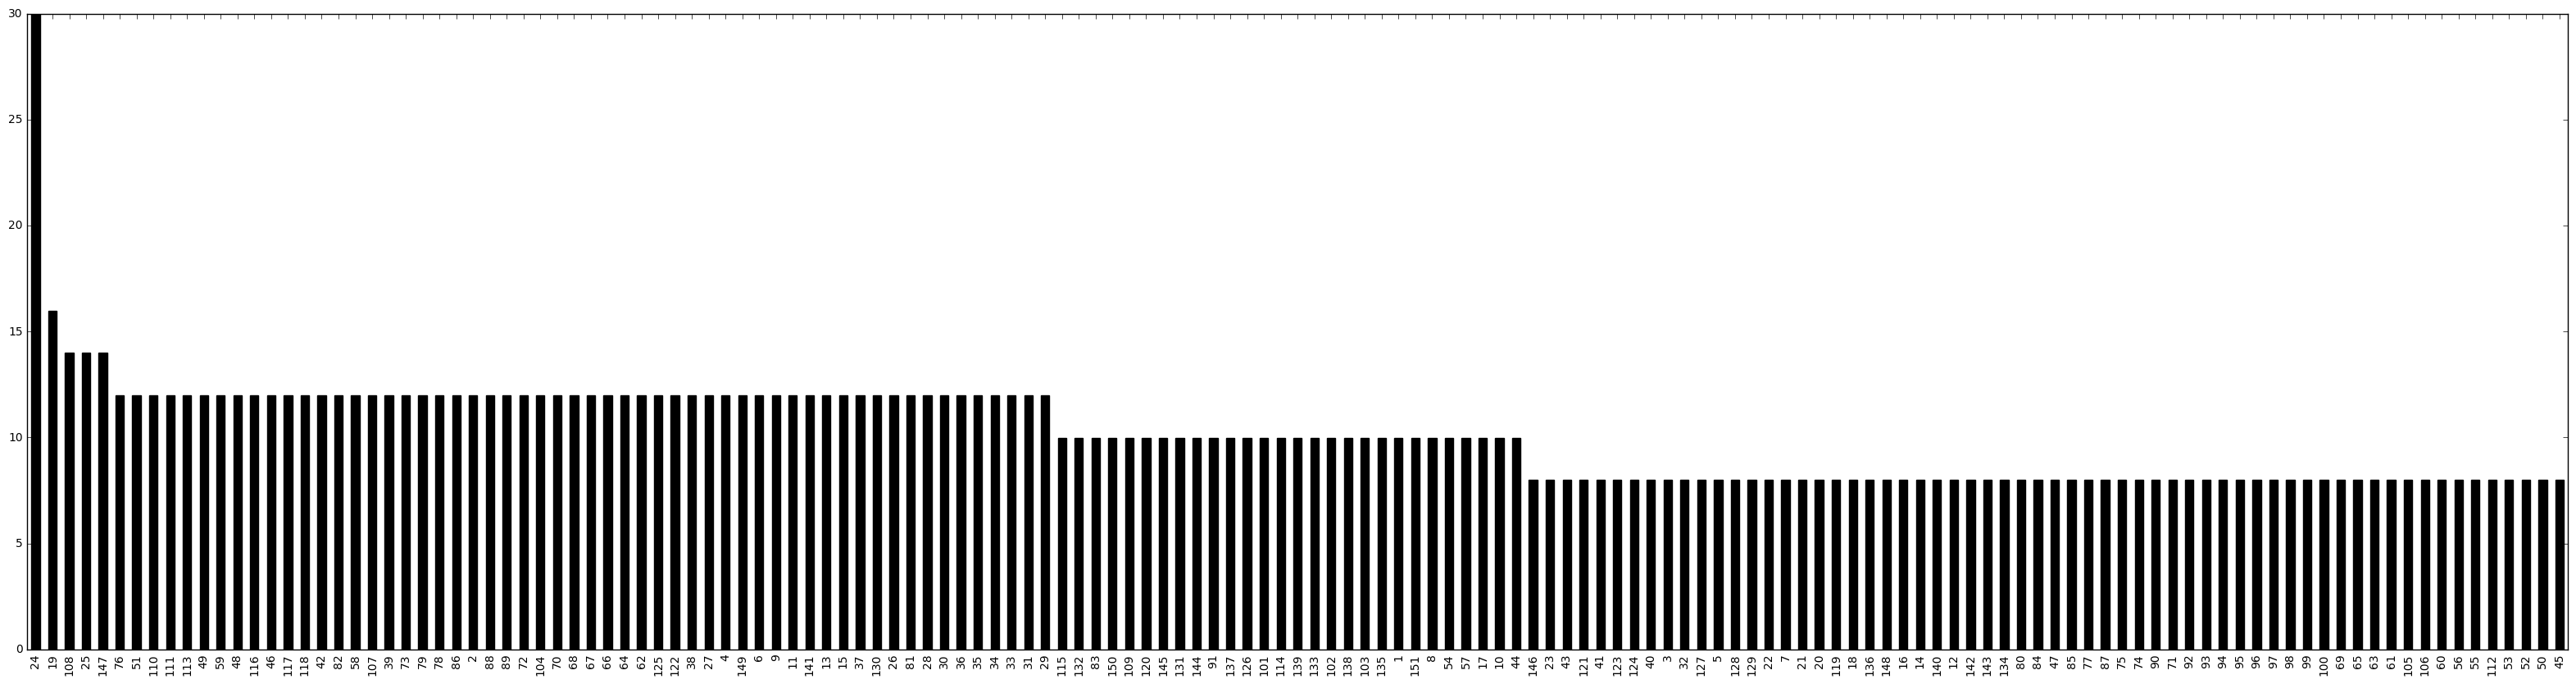

In [22]:
pack_price = df2.sort_values(by='Price', ascending=0)['Price']
pack_price[:152].plot(kind='bar', figsize=(40, 10), color='k')
# Graph of Pack Prices